In [11]:
import pandas as pd
from scipy.stats import pearsonr
import pySPaRTAN as sptn

In [5]:
adata=sptn.datasets.pbmc("CD8")
model=sptn.SPaRTAN(lamda=[0.001,1], alpha=[0.01,0.99], solver="Kron")
model=model.fit(adata, Y="normalized")
tfa= model.get_projD(adata.obsm["protein"])
tf_protein=model.get_tf_protein_cor()

In [14]:
paper_tf=pd.read_csv(
    "https://sites.pitt.edu/~xim33/data/pbmc5kn/TFa_CD8_pbmc5kn.csv",
    index_col=0).T
paper_tf_protein=pd.read_csv(
    "https://sites.pitt.edu/~xim33/data/pbmc5kn/pcc_P_TFa_CD8_pbmc5kn.csv",
    index_col=0
).T

In [43]:
tfp_tf_comp=pd.Series(None, index=tf_protein.index)
for tf in tf_protein.index:
    tfp_tf_comp.loc[tf]=pearsonr(tf_protein.loc[tf],paper_tf_protein.loc[tf])[0]
tfp_tf_comp

<ipython-input-43-025a331f497a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tfp_tf_comp=pd.Series(None, index=tf_protein.index)


CREB1     0.995939
JUN       0.947398
TEAD1     0.864578
FOS       0.957827
RXRA      0.957492
            ...   
ZNF274    0.992602
UBTF      0.989970
ZNF592    0.946156
TGIF2     0.991125
GATAD1    0.990090
Length: 255, dtype: float64

In [39]:
tfp_protein_comp=pd.Series(None, index=tf_protein.columns)
for protein in tf_protein.columns:
    tfp_protein_comp.loc[protein]=pearsonr(tf_protein[protein],paper_tf_protein[protein])[0]
tfp_protein_comp

<ipython-input-39-4e4a397e39d8>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tfp_protein_comp=pd.Series(None, index=tf_protein.columns)


CD3       0.956501
CD4       0.914496
CD8a      0.898376
CD11b     0.955985
CD14      0.935882
CD15      0.926641
CD16      0.953275
CD19      0.947745
CD20      0.976783
CD25      0.927486
CD27      0.983877
CD28      0.981257
CD34      0.969910
CD45RA    0.962520
CD45RO    0.947340
CD56      0.909777
CD62L     0.947024
CD69      0.932777
CD80      0.931139
CD86      0.874568
CD127     0.970454
CD137     0.882401
CD197     0.939771
CD274     0.926202
CD278     0.963114
CD335     0.942472
PD-1      0.916299
HLA-DR    0.928597
TIGIT     0.948803
dtype: float64

In [24]:
pearsonr(tf_protein.to_numpy().flatten(),paper_tf_protein.to_numpy().flatten())

(0.9541470079241987, 0.0)

In [32]:
tf_protein_compare=pd.Series(None, index=tf_protein.index)
for tf in tf_protein.index:
    tf_protein_compare.loc[tf]=pearsonr(tfa[tf],paper_tf[tf])[0]
tf_protein_compare

<ipython-input-32-97705b7e92d2>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tf_protein_compare=pd.Series(None, index=tf_protein.index)


CREB1     0.992469
JUN       0.910813
TEAD1     0.888818
FOS       0.961987
RXRA      0.947652
            ...   
ZNF274    0.989091
UBTF      0.983588
ZNF592    0.947085
TGIF2     0.983994
GATAD1    0.988297
Length: 255, dtype: float64

In [33]:
tfa_cell_comp=pd.Series(None, index=tfa.index)
for cell in tfa.index:
    tfa_cell_comp.loc[cell]=pearsonr(tfa.loc[cell],paper_tf.loc[cell])[0]
tfa_cell_comp

<ipython-input-33-e63faa2f8b0d>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tfa_cell_comp=pd.Series(None, index=tfa.index)


AACACACCAATCCTAG    0.999169
AACAGGGAGCGAAACC    0.999047
AACCAACTCGAGTACT    0.997702
AACCATGCAATGCAAA    0.999114
AACGGGAGTGAGATAT    0.999606
                      ...   
TTGTTCAGTAATGCTC    0.998952
TTGTTGTGTACCTTCC    0.999191
TTGTTTGTCGACCCAG    0.997089
TTTAGTCTCGGTGCAC    0.999328
TTTATGCCATCTATCT    0.999131
Length: 319, dtype: float64

In [31]:
pearsonr(tfa.to_numpy().flatten(),paper_tf.to_numpy().flatten())

(0.9988580146375152, 0.0)

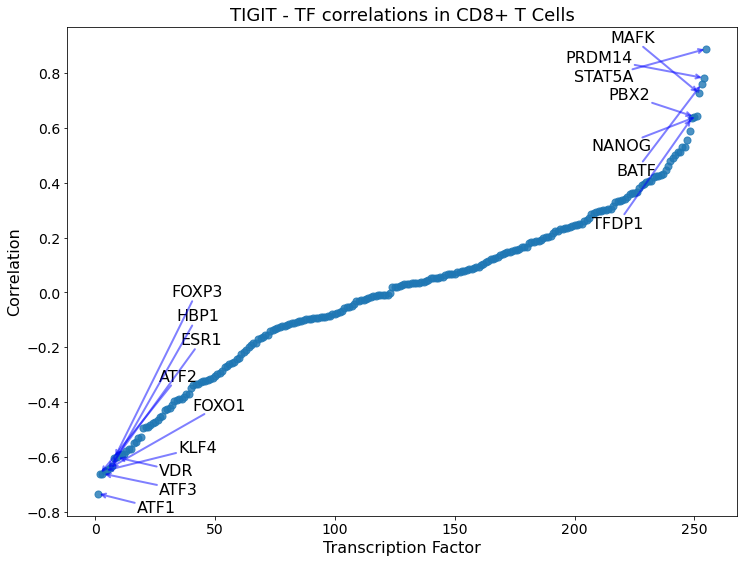

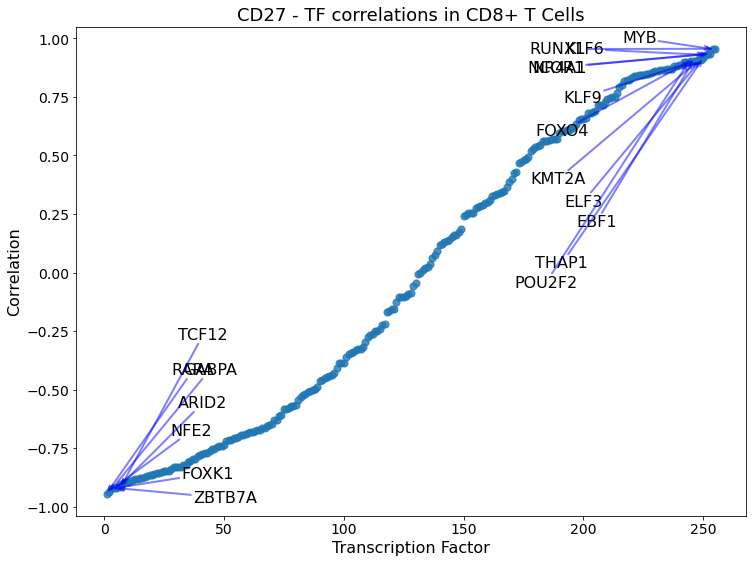

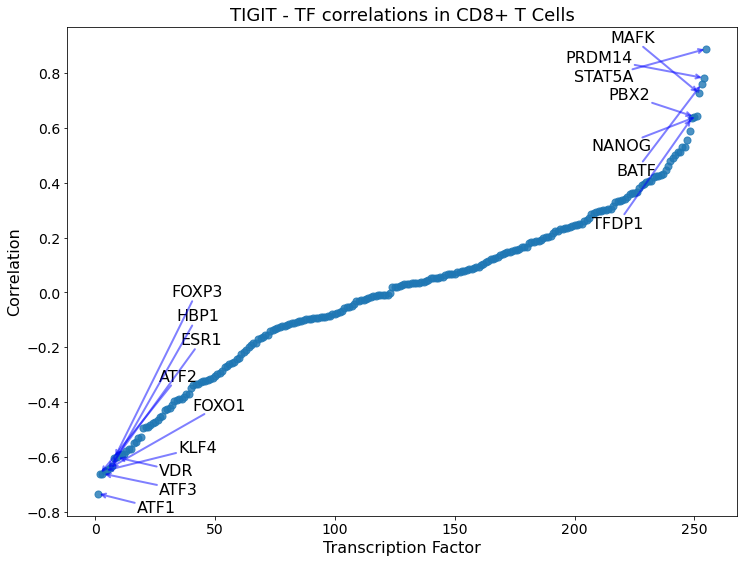

In [42]:
sptn.pl.tf_protien_line_plot(
    tf_protein, "CD27",
    title="CD27 - TF correlations in CD8+ T Cells",
    cutoff=0.9
)

sptn.pl.tf_protien_line_plot(
    tf_protein, "TIGIT",
    title="TIGIT - TF correlations in CD8+ T Cells",
    cutoff=0.6 )

In [45]:
adatas=dict()
for ct in ["B", "CD4mem", "CD4nav", "CD8", "CD14+MONO", "CD16+MONO", "DC", "NK"]:
    adatas[ct]=sptn.datasets.pbmc(ct)

In [48]:
import anndata as ad

adata=ad.concat(adatas, label="cell_types")

In [54]:
adata.obs["cell_types"].to_csv("cell_types_PBMC.csv")

In [58]:
adata.var.to_csv("hvg.csv")

In [60]:
adata

AnnData object with n_obs × n_vars = 4073 × 2643
    obs: 'training', 'cell_types'
    obsm: 'protein', 'protein_raw_counts'
    layers: 'normalized'

In [61]:
adata.var_names

Index(['NOC2L', 'ISG15', 'TNFRSF18', 'ACAP3', 'DVL1', 'AURKAIP1', 'MRPL20',
       'MIB2', 'CDK11A', 'NADK',
       ...
       'TRAPPC10', 'PFKL', 'TRPM2', 'SUMO3', 'PTTG1IP', 'ITGB2', 'ADARB1',
       'COL18A1', 'SLC19A1', 'S100B'],
      dtype='object', length=2643)

In [64]:
sptn.datasets.pbmc("CD8").varm["tf_gene"]

,CREB1,JUN,TEAD1,FOS,RXRA,PBX3,MYC,RARA,PPARG,PAX6,...,SMARCC1,KMT2B,FOXO4,SSRP1,SMAD5,ZNF274,UBTF,ZNF592,TGIF2,GATAD1
NOC2L,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISG15,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TNFRSF18,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACAP3,0.000000,0.0,0.0,0.050125,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DVL1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITGB2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADARB1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COL18A1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SLC19A1,0.131306,0.0,0.0,0.000000,0.0,0.0,0.062257,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
tf_gene=pd.read_csv("https://sites.pitt.edu/~xim33/data/SPaRTAN_input/D_pbmc.csv", index_col=0)

In [66]:
tf_gene

,CREB1,JUN,TEAD1,FOS,RXRA,PBX3,MYC,RARA,PPARG,PAX6,...,SMARCC1,KMT2B,FOXO4,SSRP1,SMAD5,ZNF274,UBTF,ZNF592,TGIF2,GATAD1
NOC2L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ISG15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNFRSF18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACAP3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DVL1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITGB2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADARB1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COL18A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SLC19A1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


['NOC2L',
 'ISG15',
 'TNFRSF18',
 'ACAP3',
 'DVL1',
 'AURKAIP1',
 'MRPL20',
 'MIB2',
 'CDK11A',
 'NADK',
 'GNB1',
 'PRKCZ',
 'FAAP20',
 'SKI',
 'KCNAB2',
 'RPL22',
 'NOL9',
 'KLHL21',
 'PARK7',
 'RERE',
 'ENO1',
 'H6PD',
 'PIK3CD',
 'CLSTN1',
 'CTNNBIP1',
 'UBE4B',
 'DFFA',
 'PEX14',
 'MAD2L2',
 'AGTRAP',
 'MTHFR',
 'CLCN6',
 'MIIP',
 'TNFRSF8',
 'VPS13D',
 'DHRS3',
 'PRDM2',
 'EFHD2',
 'CASP9',
 'ZBTB17',
 'CROCC',
 'RCC2',
 'ARHGEF10L',
 'IFFO2',
 'UBR4',
 'CAPZB',
 'TMCO4',
 'PINK1',
 'EIF4G3',
 'ECE1',
 'USP48',
 'ZBTB40',
 'HNRNPR',
 'ID3',
 'PNRC2',
 'RCAN3',
 'RUNX3',
 'RSRP1',
 'LDLRAP1',
 'MAN1C1',
 'STMN1',
 'SH3BGRL3',
 'HMGN2',
 'RPS6KA1',
 'ARID1A',
 'SLC9A1',
 'WDTC1',
 'SYTL1',
 'AHDC1',
 'FGR',
 'IFI6',
 'EYA3',
 'PTAFR',
 'PHACTR4',
 'RCC1',
 'EPB41',
 'LAPTM5',
 'PUM1',
 'PTP4A2',
 'KHDRBS1',
 'KPNA6',
 'LCK',
 'HDAC1',
 'RBBP4',
 'YARS',
 'S100PBP',
 'AK2',
 'PHC2',
 'ZMYM4',
 'KIAA0319L',
 'TRAPPC3',
 'MAP7D1',
 'THRAP3',
 'STK40',
 'CSF3R',
 'MTF1',
 'INPP5B',
 'UT

In [73]:
import numpy as np
np.intersect1d(tf_gene.index,
               pd.read_csv("hvg.csv").iloc[:,0].to_list())

array(['AAK1', 'AARS', 'ABAT', ..., 'ZNRF1', 'ZSWIM6', 'ZZEF1'],
      dtype=object)

In [74]:
pd.read_csv("hvg.csv").index

RangeIndex(start=0, stop=2643, step=1)